# Exploratory Machine Learning

In [219]:
%matplotlib inline

import numpy as np
import pandas as pd
from scipy import stats

import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn.preprocessing import RobustScaler

In [2]:
# import seaborn as sns
# sns.set()

In [230]:
params = { 'axes.grid': True
          ,'axes.axisbelow': True
          ,'grid.color': '0.5'
          ,'legend.numpoints': 1
          ,'savefig.bbox': 'tight'
          ,'font.size': 16
          ,'legend.loc': 'best'
          ,'legend.fontsize': 'medium'
          #,'lines.markersize': 6
          ,'xtick.labelsize': 'small'
          ,'ytick.labelsize': 'small'
          #,'xtick.direction': 'out'
          #,'ytick.direction': 'out'
          ,'figure.figsize': [8, 6]
          #,'axes.labelsize': 'large'   # no need to change these sizes, just change font.size
          #,'axes.titlesize': 'x-large'
}
plt.rcParams.update(params)

# Get all data

In [4]:
data_df= pd.read_csv('model_feats/data.csv')

In [5]:
feats_df= pd.read_csv('model_feats/feats.csv')
target_df= pd.read_csv('model_feats/target.csv')
# target= np.array(target_df).squeeze()
Npts= len(target_df)
print "Total number of data points: %d" % Npts
print "Total number of features: %d" % len(feats_df.columns)

Total number of data points: 265
Total number of features: 46


In [6]:
feats_df.shape

(265, 46)

In [7]:
feats_df.head()

,Good,Moderate,Unhealthy for Sensitive Groups,Unhealthy,Very Unhealthy,AQI 90th Percentile,AQI Median,# Days CO,# Days NO2,# Days O3,...,Adult smokers (%),Second-hand smoke (%),Adult obese (%),Unemployment (%),Medicare (%),Medi-Cal (%),Private (%),Other (%),Radon Zone,Population near busy roads (%)
0,0.602740,0.367123,0.030137,0.000000,0.0,74.0,44.0,0.0,0.043836,0.372603,...,11.0,7.4,21.0,10.7,14.97,46.92,23.22,14.9,2,71.7
1,0.715847,0.273224,0.008197,0.002732,0.0,64.0,41.0,0.0,0.040984,0.483607,...,11.0,7.4,21.0,10.7,14.97,46.92,23.22,14.9,2,71.7
2,0.517808,0.460274,0.021918,0.000000,0.0,79.0,50.0,0.0,0.030137,0.210959,...,11.0,7.4,21.0,10.7,14.97,46.92,23.22,14.9,2,71.7
3,0.673973,0.298630,0.027397,0.000000,0.0,69.0,43.0,0.0,0.076712,0.416438,...,11.0,7.4,21.0,10.7,14.97,46.92,23.22,14.9,2,71.7
4,0.586301,0.380822,0.032877,0.000000,0.0,76.0,46.0,0.0,0.032877,0.482192,...,11.0,7.4,21.0,10.7,14.97,46.92,23.22,14.9,2,71.7


Normalize Data via a robust scaler

In [9]:
scaler= RobustScaler()

scale_feats_df= scaler.fit_transform(feats_df)
scale_feats_df= pd.DataFrame(data=scale_feats_df,index=feats_df.index,columns=feats_df.columns)

In [10]:
scale_feats_df.head()

,Good,Moderate,Unhealthy for Sensitive Groups,Unhealthy,Very Unhealthy,AQI 90th Percentile,AQI Median,# Days CO,# Days NO2,# Days O3,...,Adult smokers (%),Second-hand smoke (%),Adult obese (%),Unemployment (%),Medicare (%),Medi-Cal (%),Private (%),Other (%),Radon Zone,Population near busy roads (%)
0,-0.026925,0.104623,-0.029395,0.000000,0.0,-0.263158,-0.0625,0.0,4.000000,-0.782203,...,-0.973684,0.5,-0.449541,-0.243902,-0.043805,0.0,-0.086079,0.889117,0.0,1.144068
1,0.272713,-0.253954,-0.272773,0.249317,0.0,-0.526316,-0.2500,0.0,3.739754,-0.370618,...,-0.973684,0.5,-0.449541,-0.243902,-0.043805,0.0,-0.086079,0.889117,0.0,1.144068
2,-0.251921,0.460341,-0.120568,0.000000,0.0,-0.131579,0.3125,0.0,2.750000,-1.381554,...,-0.973684,0.5,-0.449541,-0.243902,-0.043805,0.0,-0.086079,0.889117,0.0,1.144068
3,0.161782,-0.156935,-0.059786,0.000000,0.0,-0.394737,-0.1250,0.0,7.000000,-0.619667,...,-0.973684,0.5,-0.449541,-0.243902,-0.043805,0.0,-0.086079,0.889117,0.0,1.144068
4,-0.070472,0.156935,0.000996,0.000000,0.0,-0.210526,0.0625,0.0,3.000000,-0.375864,...,-0.973684,0.5,-0.449541,-0.243902,-0.043805,0.0,-0.086079,0.889117,0.0,1.144068


Check if there are any rows that could need a different transform

In [48]:
indsTMP= scale_feats_df.std() > 5.

print scale_feats_df.loc[:,indsTMP].std()

# Days PM10                    8.286294
Area burned percent           36.758729
Population per square mile     5.889040
dtype: float64


In [82]:
indsCHECK= np.where(indsTMP)[0]

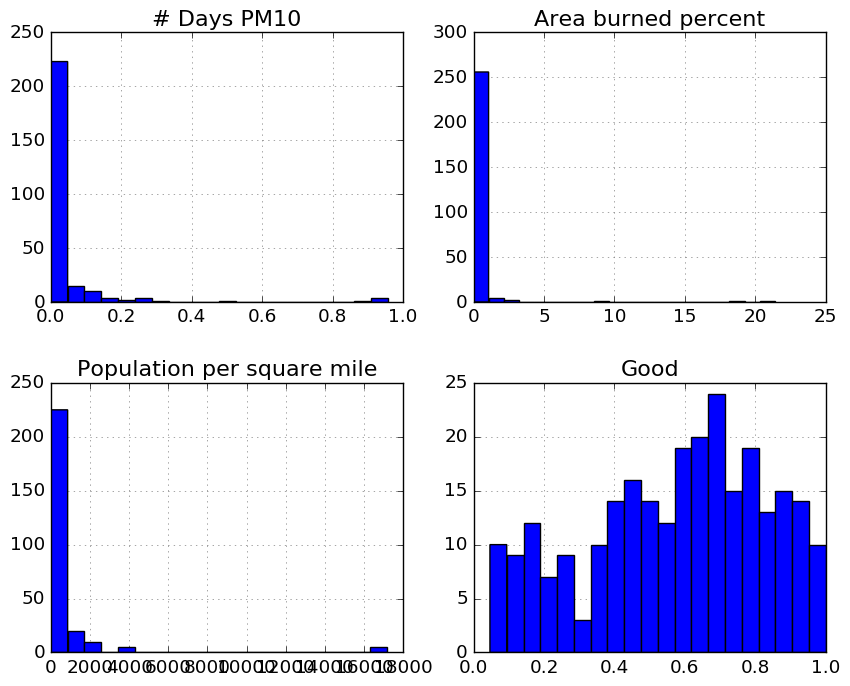

In [85]:
fig= plt.figure(figsize=(10,8))

ax1=plt.subplot(221)
ax1.hist(feats_df.iloc[:,indsCHECK[0]],bins=20)
ax1.set_title(feats_df.columns[indsCHECK[0]],fontdict={'fontsize':'medium'})

ax2=plt.subplot(222)
ax2.hist(feats_df.iloc[:,indsCHECK[1]],bins=20)
ax2.set_title(feats_df.columns[indsCHECK[1]],fontdict={'fontsize':'medium'})

ax3=plt.subplot(223)
ax3.hist(feats_df.iloc[:,indsCHECK[2]],bins=20)
ax3.set_title(feats_df.columns[indsCHECK[2]],fontdict={'fontsize':'medium'})

ax4=plt.subplot(224)
ax4.hist(feats_df.iloc[:,0],bins=20)
ax4.set_title(feats_df.columns[0],fontdict={'fontsize':'medium'})

plt.subplots_adjust(hspace=0.3)

Some of this data could be better described after taking a log transform: either log(data) or log(data + 0.01)

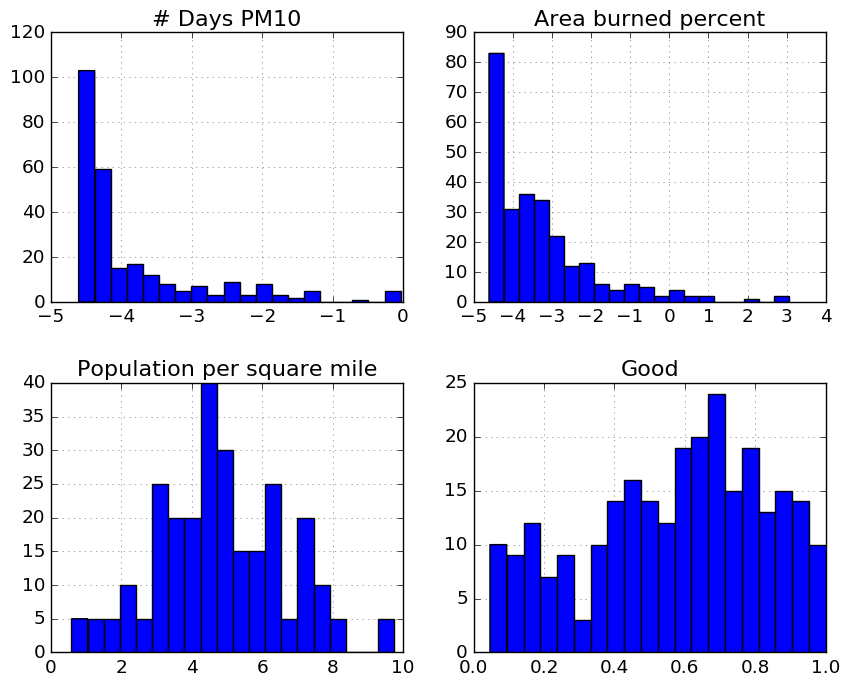

In [113]:
fig= plt.figure(figsize=(10,8))

ax1=plt.subplot(221)
ax1.hist(np.log(feats_df.iloc[:,indsCHECK[0]] + 1e-2),bins=20)
ax1.set_title(feats_df.columns[indsCHECK[0]],fontdict={'fontsize':'medium'})

ax2=plt.subplot(222)
ax2.hist(np.log(feats_df.iloc[:,indsCHECK[1]] + 1e-2),bins=20)
ax2.set_title(feats_df.columns[indsCHECK[1]],fontdict={'fontsize':'medium'})

ax3=plt.subplot(223)
ax3.hist(np.log(feats_df.iloc[:,indsCHECK[2]]),bins=20)
ax3.set_title(feats_df.columns[indsCHECK[2]],fontdict={'fontsize':'medium'})

ax4=plt.subplot(224)
ax4.hist(feats_df.iloc[:,0],bins=20)
ax4.set_title(feats_df.columns[0],fontdict={'fontsize':'medium'})

plt.subplots_adjust(hspace=0.3)

# Linear Regression model

Based on the notebook for the Programming Machine Learning Applications course, present on http://facweb.cs.depaul.edu/mobasher/classes/csc478/Notes/IPython%20Notebook%20-%20Regression.html
and on the tutorial by Jake Vanderplas, present on http://nbviewer.jupyter.org/github/jakevdp/sklearn_tutorial/blob/master/notebooks/Index.ipynb

In [106]:
linreg = linear_model.LinearRegression()

Train the Linear Regression Model

In [142]:
linreg.fit(scale_feats_df,target_df)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [143]:
R2= linreg.score(scale_feats_df,target_df)
print 'R^2= %f' % R2

R^2= 0.838407


In [144]:
y_real= np.array(target_df).squeeze()
y_predict= linreg.predict(scale_feats_df).squeeze()

err = abs(y_predict - y_real)
# err= err.squeeze()
total_error = np.dot(err,err)

RMSE_train = np.sqrt(total_error/len(y_predict))
print 'RMSE= %f' % RMSE_train

RMSE= 11.129972


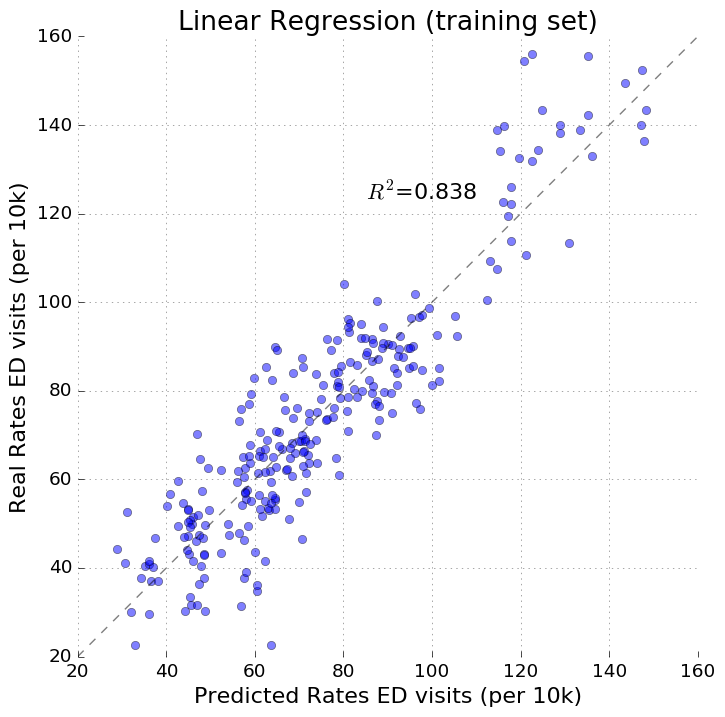

In [118]:
plt.figure(figsize=(8,8))
ax= plt.subplot(111)

plt.plot(y_predict, y_real,'bo',alpha=0.5)

xmin,xmax= plt.xlim()
z= np.linspace(xmin, xmax,10)
plt.plot(z, z,'k--',alpha=0.5)

plt.xlabel('Predicted Rates ED visits (per 10k)')
plt.ylabel('Real Rates ED visits (per 10k)')
plt.title('Linear Regression (training set)')

line= r'$R^2$=%.3f' % R2
plt.text(85,125,line,va='center')
ax.axes.set_frame_on(False)
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

plt.savefig('LinearRegression_TrainingSet.png')

Regression coefficients

In [119]:
print linreg.coef_
print linreg.intercept_

[[  6.71624330e+10   4.65921049e+10   1.60395857e+10   1.94984252e+09
    1.77923130e+11   1.77136211e+01   1.22364502e+01   9.41845079e+11
    1.03215899e+10   2.54014046e+11   9.41845079e+11   2.47718158e+11
    1.55249189e+10   2.95104980e-02   1.06494141e+00   2.26198730e+01
   -4.43886833e+01   2.91030884e-01   2.04541016e+00   6.25886841e+01
    5.05733032e+01   2.31941528e+01   8.58779602e+01   4.99536133e+00
   -9.37933350e+00   1.32800293e+02   1.52902822e+02  -3.07572479e+01
    2.82966590e+01   2.11705017e+00   4.32952881e-01  -7.99118042e+00
    1.69513550e+01   2.38391113e+01  -2.33825684e-01  -3.04880524e+00
    2.83067322e+00  -1.16616821e+00  -6.05612183e+00   7.07373047e+00
   -1.31186261e+03  -2.32242374e+03  -2.44343994e+03  -8.02027649e+02
    2.33991623e+00  -2.27685547e+00]]
[ -4.13007680e+10]


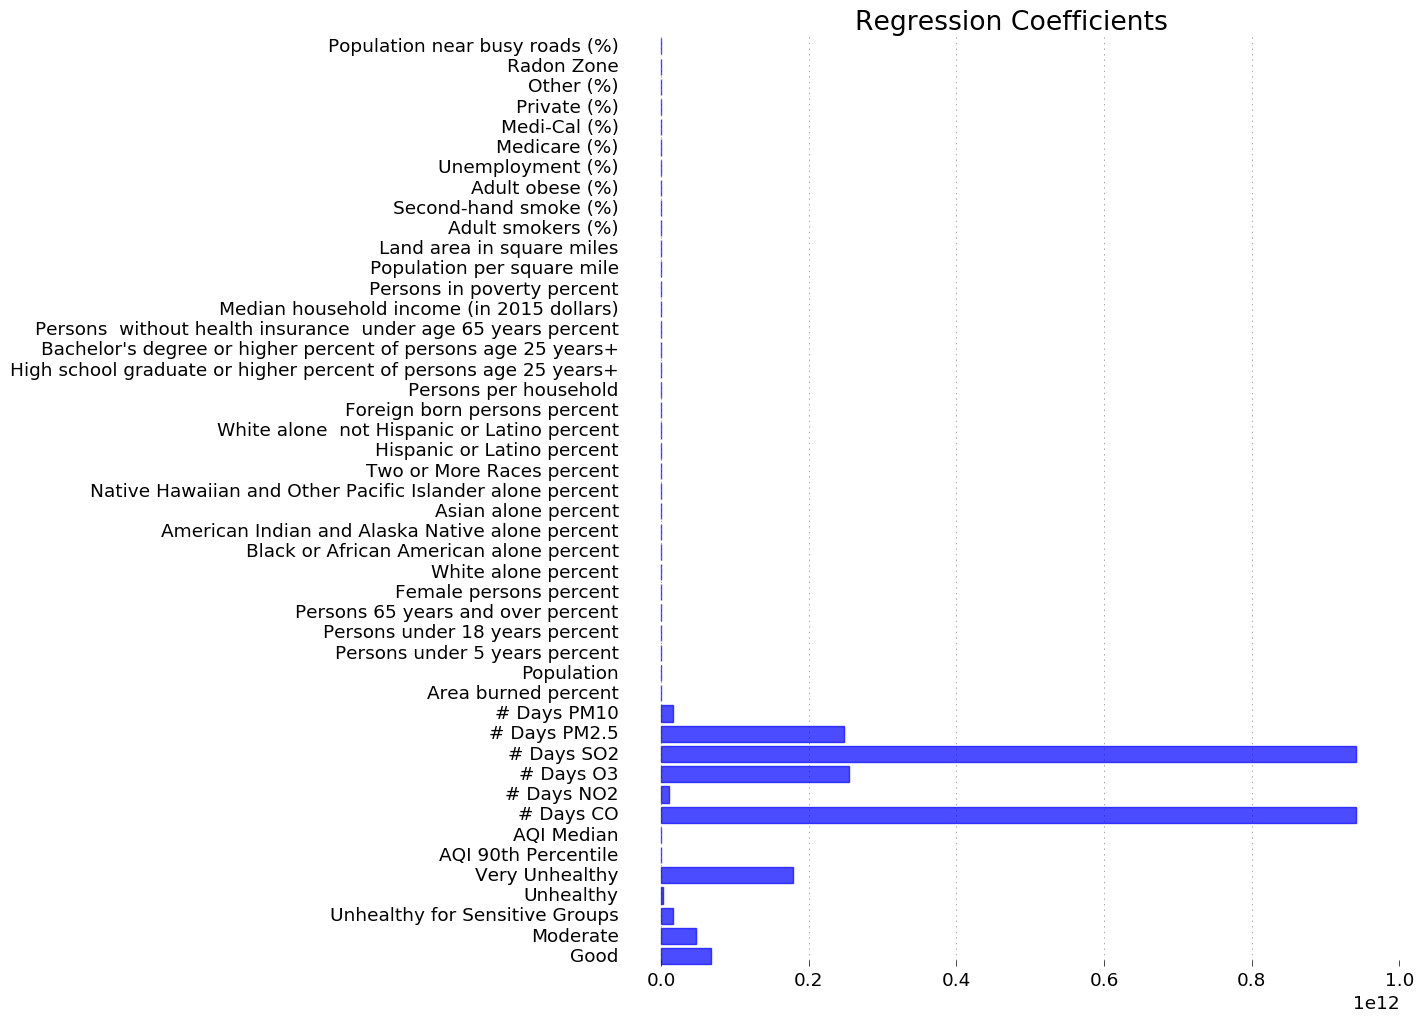

In [124]:
plt.figure(figsize=(10,12))
ax= plt.subplot(111)

Nlim= len(linreg.coef_.squeeze())
indsPLT= np.arange(Nlim)
width= 0.8
shift= 0.5*(1.-width)

plt.barh(indsPLT+shift, linreg.coef_.squeeze(), height=width, color='b',ec='b',alpha=.7)

# plt.legend(loc='best')
plt.xlim(xmin=-0.05e12)
plt.ylim(0,Nlim)
plt.grid(axis='y')
plt.yticks(indsPLT+0.5,feats_df.columns)
plt.title('Regression Coefficients')

ax.yaxis.set_ticks_position('none')
ax.set_frame_on(False)
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('none')
# xmin,xmax= plt.xlim()
# ax.hlines(indsPLT,xmin,xmax,colors='0.75',linestyles=':')

plt.savefig('LinearRegression_TrainingSet_coeff.png')

### Using a testing set

In [276]:
from sklearn.cross_validation import train_test_split

In [277]:
X_train, X_test, y_train, y_test = train_test_split(scale_feats_df, target_df, train_size=0.7, random_state=2)
X_train.shape, X_test.shape

((185, 46), (80, 46))

In [278]:
linreg.fit(X_train,y_train)
y_pred = linreg.predict(X_test)

In [279]:
err= np.abs(y_pred-y_test).squeeze()
RMSE_test= np.sqrt(np.dot(err,err)/len(y_test))

In [280]:
print 'Simple Linear Regression'
print('RMSE on training: %.4f' % RMSE_train)
print('RMSE on test data: %.4f' % RMSE_test)

Simple Linear Regression
RMSE on training: 11.1300
RMSE on test data: 14.9374


In [261]:
y_pred= y_pred.squeeze()

In [257]:
r,p = stats.pearsonr(y_pred,y_train)
print 'R^2= %f' % r**2
print 'Spearman r^2=%f' % stats.spearmanr(y_pred,y_train)[0]**2

ValueError: operands could not be broadcast together with shapes (80,) (185,) 

Existence of one big outlier

In [228]:
pd.Series(z_predict).describe()

count    4.600000e+01
mean     2.645916e+09
std      1.247177e+10
min     -1.563344e+10
25%      6.470043e+01
50%      8.154129e+01
75%      9.311589e+01
max      6.871973e+10
dtype: float64

(0, 200)

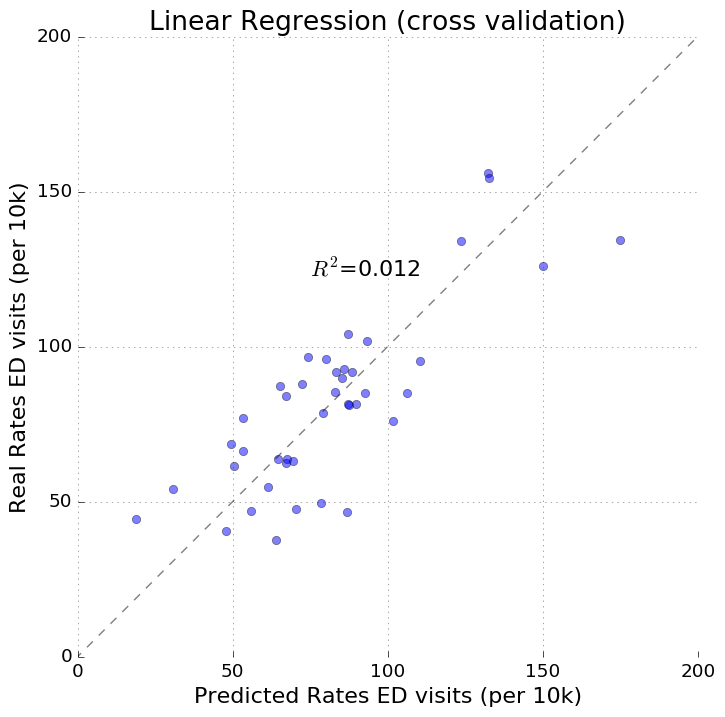

In [231]:
plt.figure(figsize=(8,8))
ax= plt.subplot(111)

plt.plot(z_predict, z_real,'bo',alpha=0.5)

xmin,xmax= plt.xlim()
z= np.linspace(xmin, xmax,10)
plt.plot(z, z,'k--',alpha=0.5)

plt.xlabel('Predicted Rates ED visits (per 10k)')
plt.ylabel('Real Rates ED visits (per 10k)')
plt.title('Linear Regression (cross validation)')

line= r'$R^2$=%.3f' % (r**2)
plt.text(75,125,line,va='center')
ax.axes.set_frame_on(False)
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

plt.xlim(0,200)
plt.ylim(0,200)

# plt.savefig('LinearRegression_CrossValidation.png')

### Use 5-fold cross-validation

In [275]:
from sklearn.cross_validation import cross_val_score

In [183]:
from sklearn.cross_validation import KFold

In [224]:
kf = KFold(len(scale_feats_df.columns), n_folds=5, shuffle=True, random_state=2)

z_predict=[]
z_real=[]
crossval_err = 0.0
for train,test in kf:
    linreg.fit(scale_feats_df.iloc[train],target_df.iloc[train])

    y_predict = linreg.predict(scale_feats_df.iloc[test])
    z_predict.append(y_predict)
    z_real.append(target_df.iloc[test])
    
    err = np.abs(y_predict - target_df.iloc[test]).squeeze()
    crossval_err += np.dot(err,err)

RMSE_5CV = np.sqrt(crossval_err/len(feats_df.columns))

In [281]:
print 'Simple Linear Regression'
print('RMSE on training: %.4f' % RMSE_train)
print('RMSE on test data: %.4f' % RMSE_test)
print('RMSE on 5-fold CV: %.4f' % RMSE_5CV)

Simple Linear Regression
RMSE on training: 11.1300
RMSE on test data: 14.9374
RMSE on 5-fold CV: 12616037829.6027


In [226]:
z_predict= np.concatenate(z_predict).squeeze()
z_real= np.concatenate(z_real).squeeze()

In [227]:
r,p = stats.pearsonr(z_predict,z_real)
print 'R^2= %f' % r**2
print 'Spearman r^2=%f' % stats.spearmanr(z_predict,z_real)[0]**2

R^2= 0.011831
Spearman r^2=0.534502


Existence of one big outlier

In [228]:
pd.Series(z_predict).describe()

count    4.600000e+01
mean     2.645916e+09
std      1.247177e+10
min     -1.563344e+10
25%      6.470043e+01
50%      8.154129e+01
75%      9.311589e+01
max      6.871973e+10
dtype: float64

(0, 200)

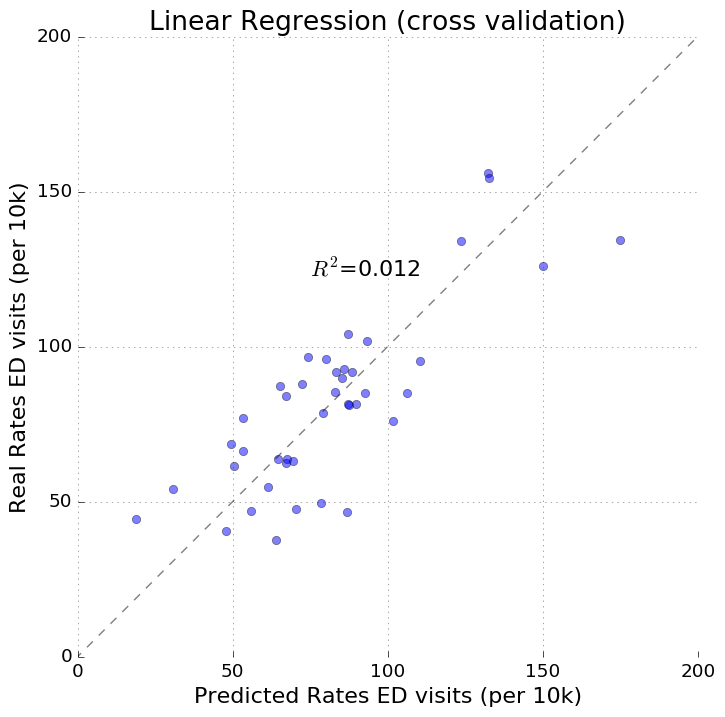

In [231]:
plt.figure(figsize=(8,8))
ax= plt.subplot(111)

plt.plot(z_predict, z_real,'bo',alpha=0.5)

xmin,xmax= plt.xlim()
z= np.linspace(xmin, xmax,10)
plt.plot(z, z,'k--',alpha=0.5)

plt.xlabel('Predicted Rates ED visits (per 10k)')
plt.ylabel('Real Rates ED visits (per 10k)')
plt.title('Linear Regression (cross validation)')

line= r'$R^2$=%.3f' % (r**2)
plt.text(75,125,line,va='center')
ax.axes.set_frame_on(False)
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

plt.xlim(0,200)
plt.ylim(0,200)

# plt.savefig('LinearRegression_CrossValidation.png')

### Ridge Regression model

In [163]:
ridgereg = linear_model.Ridge(fit_intercept=True, alpha=0.5)

Train the Ridge Regression Model

In [164]:
ridgereg.fit(feats_df,target_df)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [165]:
y_predict= ridgereg.predict(feats_df)

err = abs(y_predict - y_real)
total_error = np.dot(err,err)

RMSE_train = np.sqrt(total_error/len(y_predict))
print RMSE_train

12.1823033074


In [166]:
R2= ridgereg.score(feats_df,target_df)

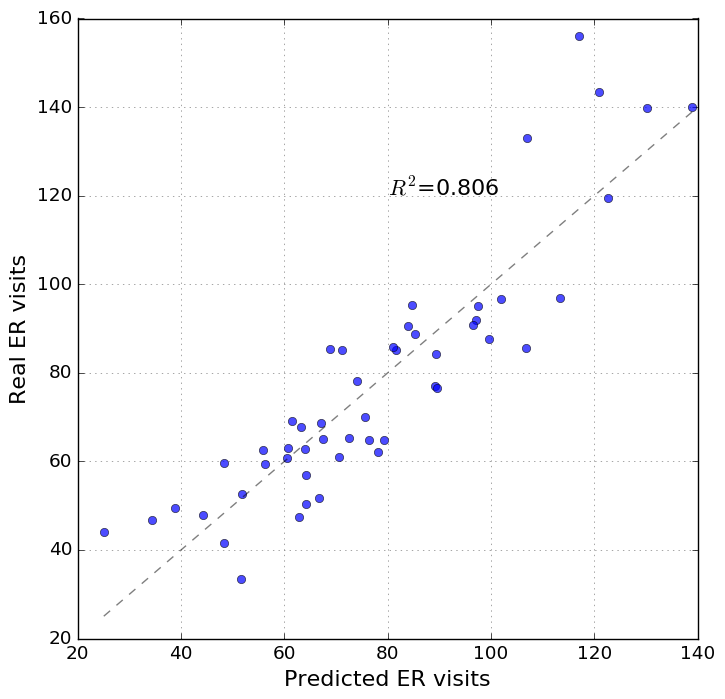

In [167]:
plt.figure(figsize=(8,8))

plt.plot(y_predict, y_real,'bo',alpha=0.7)
z= np.linspace(np.min(y_predict), np.max(y_predict),10)
plt.plot(z, z,'k--',alpha=0.5)
plt.xlabel('Predicted ER visits')
plt.ylabel('Real ER visits')

line= r'$R^2$=%.3f' % R2
plt.text(80,120,line)

# plt.savefig('RidgeRegression_TrainingSet.png')

In [168]:
kf = KFold(len(feats_df.columns), n_folds=5, shuffle=True)

z_predict=[]
z_real=[]
crossval_err = 0
for train,test in kf:
    ridgereg.fit(feats_df.iloc[train],target_df.iloc[train])

    y_predict = ridgereg.predict(feats_df.iloc[test])
    z_predict.append(y_predict)
    z_real.append(target_df.iloc[test])
    
    err = np.abs(y_predict - target_df.iloc[test])
    crossval_err += np.dot(err,err)
    
RMSE_5CV = np.sqrt(crossval_err/len(feats_df.columns))

In [169]:
print 'Simple Linear Regression'
print('RMSE on training: %.4f' % RMSE_train)
print('RMSE on 5-fold CV: %.4f' % RMSE_5CV)

Simple Linear Regression
RMSE on training: 12.1823
RMSE on 5-fold CV: 255.4516


In [170]:
z_predict= np.concatenate(z_predict)
z_real= np.concatenate(z_real)

In [171]:
r,p = stats.pearsonr(z_predict,z_real)

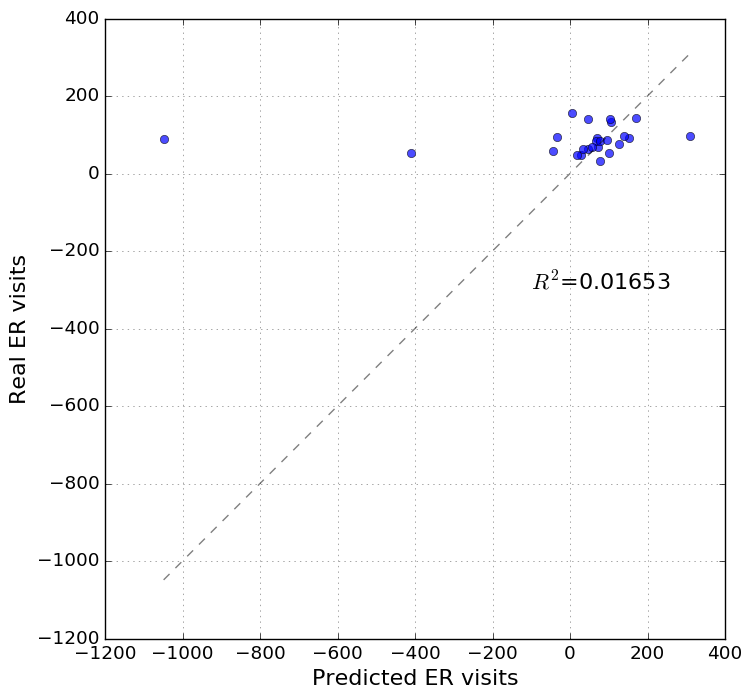

In [174]:
plt.figure(figsize=(8,8))

plt.plot(z_predict, z_real,'bo',alpha=0.7)
z= np.linspace(np.min(z_predict), np.max(z_predict),10)
plt.plot(z, z,'k--',alpha=0.5)
plt.xlabel('Predicted ER visits')
plt.ylabel('Real ER visits')


line= r'$R^2$=%.5f' % (r**2)
plt.text(80,-300,line,ha='center')

# plt.savefig('RidgeRegression_CrossValidation.png')

# SVM regressor

In [ ]:
from sklearn.svm import SVR  # Support Vector Regressor

# Random Forest Regressor

In [72]:
from sklearn.ensemble import RandomForestRegressor

In [63]:
RandomForestRegressor?

In [73]:
model = RandomForestRegressor()
model.fit(feats_df, target_df)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [ ]:
# Plot the data and the model prediction
X_fit = np.linspace(0, 1, 100)[:, np.newaxis]
y_fit = model.predict(X_fit)

plt.plot(X.squeeze(), y, 'o')
plt.plot(X_fit.squeeze(), y_fit);